# 异常检测

异常检测设定的类型
- 监督AD
    * 标签可用于正常和异常数据
    * 类似稀有类挖掘/不平衡分类
- 半监督AD(新奇检测)
    * 只有正常的数据可供训练
    * 该算法仅学习正常数据
- 无监督AD(异常值检测)
    * 没有标签, 训练集 = 正常 + 异常数据
    * 假设: 异常非常罕见

# note:
* [covariance matrix](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)
* [multivariate_normal](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html)
* [seaborn  bivariate kernel density estimate](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html#seaborn.kdeplot)

## 高斯分布

通常如果我们认为变量 $x$ 符合高斯分布 $x \sim N(\mu, \sigma^2)$则其概率密度函数为：

$p(x,\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

我们可以利用已有的数据来预测总体中的$μ​$和$σ^2​$的计算方法如下：

$\mu=\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}$


$\sigma^2=\frac{1}{m}\sum\limits_{i=1}^{m}(x^{(i)}-\mu)^2$

## 使用高斯分布进行异常检测

异常检测算法：

对于给定的数据集 $x^{(1)},x^{(2)},...,x^{(m)}$，我们要针对每一个特征计算 $\mu$ 和 $\sigma^2$ 的估计值。

$\mu_j=\frac{1}{m}\sum\limits_{i=1}^{m}x_j^{(i)}$

$\sigma_j^2=\frac{1}{m}\sum\limits_{i=1}^m(x_j^{(i)}-\mu_j)^2$

一旦我们获得了平均值和方差的估计值，给定新的一个训练实例，根据模型计算 $p(x)$：

$p(x)=\prod\limits_{j=1}^np(x_j;\mu_j,\sigma_j^2)=\prod\limits_{j=1}^1\frac{1}{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

当$p(x) < \varepsilon$时，为异常。

## 开发和评价异常检测系统

异常检测算法是一个非监督学习算法，意味着我们无法根据结果变量 $ y$ 的值来告诉我们数据是否真的是异常的。我们需要另一种方法来帮助检验算法是否有效。当我们开发一个异常检测系统时，我们从带标记（异常或正常）的数据着手，我们从其中选择一部分正常数据用于构建训练集，然后用剩下的正常数据和异常数据混合的数据构成交叉检验集和测试集。

例如：我们有10000台正常引擎的数据，有20台异常引擎的数据。 我们这样分配数据：

6000台正常引擎的数据作为训练集

2000台正常引擎和10台异常引擎的数据作为交叉检验集

2000台正常引擎和10台异常引擎的数据作为测试集

具体的评价方法如下：

1. 根据测试集数据，我们估计特征的平均值和方差并构建$p(x)$函数

2. 对交叉检验集，我们尝试使用不同的$\varepsilon$值作为阀值，并预测数据是否异常，根据$F1$值或者查准率与查全率的比例来选择 $\varepsilon$

3. 选出 $\varepsilon​$ 后，针对测试集进行预测，计算异常检验系统的$F1​$值，或者查准率与查全率之比

## 异常检测和监督学习的比较

| 异常检测                                | 监督学习                                     |
| ----------------------------------- | ---------------------------------------- |
| 非常少量的正向类（异常数据 $y=1$）, 大量的负向类（$y=0$） | 同时有大量的正向类和负向类                            |
| 许多不同种类的异常，非常难。根据非常 少量的正向类数据来训练算法。   | 有足够多的正向类实例，足够用于训练 算法，未来遇到的正向类实例可能与训练集中的非常近似。 |
| 未来遇到的异常可能与已掌握的异常、非常的不同。             |                                          |
| 例如： 欺诈行为检测 生产（例如飞机引擎）检测数据中心的计算机运行状况 | 例如：邮件过滤器 天气预报 肿瘤分类                       |

## 多元高斯分布

在一般的高斯分布模型中，我们计算$ p(x) $的方法是：

通过分别计算每个特征对应的几率然后将其累乘起来，在多元高斯分布模型中，我们将构建特征的协方差矩阵，用所有的特征一起来计算$ p(x)$。

我们首先计算所有特征的平均值，然后再计算协方差矩阵：

$ p(x)=\prod_{j=1}^np(x_j;\mu,\sigma_j^2)=\prod_{j=1}^n\frac{1}{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

$\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$

$\Sigma = \frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu)(x^{(i)}-\mu)^T=\frac{1}{m}(X-\mu)^T(X-\mu)$

注:其中$\mu$  是一个向量，其每一个单元都是原特征矩阵中一行数据的均值。最后我们计算多元高斯分布的$p\left( x \right)$:

$p(x)=\frac{1}{(2\pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}}exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$



多元高斯分布模型与原高斯分布模型的关系：

可以证明的是，原本的高斯分布模型是多元高斯分布模型的一个子集，即像上图中的第1、2、3，3个例子所示，如果协方差矩阵只在对角线的单位上有非零的值时，即为原本的高斯分布模型了。

原高斯分布模型和多元高斯分布模型的比较：

| 原高斯分布模型                                               | 多元高斯分布模型                                             |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| 不能捕捉特征之间的相关性 但可以通过将特征进行组合的方法来解决 | 自动捕捉特征之间的相关性                                     |
| 计算代价低，能适应大规模的特征                               | 计算代价较高 训练集较小时也同样适用                          |
|                                                              | 必须要有 $m>n$，不然的话协方差矩阵$\Sigma$不可逆的，通常需要 $m>10n​$ 另外特征冗余也会导致协方差矩阵不可逆 |

原高斯分布模型被广泛使用着，如果特征之间在某种程度上存在相互关联的情况，我们可以通过构造新新特征的方法来捕捉这些相关性。

如果训练集不是太大，并且没有太多的特征，我们可以使用多元高斯分布模型。

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(context="notebook", style="white", palette=sns.color_palette("RdBu"))

import numpy as np
import pandas as pd
import scipy.io as sio
from scipy import stats
from sklearn.model_selection import train_test_split

You want to divide data into 3 set. 
1. Training set
2. Cross Validation set
3. Test set.  

You shouldn't be doing prediction using training data or Validation data as it does in the exercise.

In [2]:
mat = sio.loadmat('./data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [3]:
X = mat.get('X')

In [4]:
mat.get('yval').shape

(307, 1)

divide original validation data into validation and test set

In [5]:
Xval, Xtest, yval, ytest = train_test_split(mat.get('Xval'),
                                            mat.get('yval').ravel(),
                                            test_size=0.5)

Visualize training data

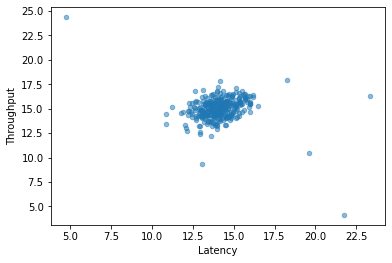

In [6]:
sns.regplot('Latency', 'Throughput',
           data=pd.DataFrame(X, columns=['Latency', 'Throughput']), 
           fit_reg=False,
           scatter_kws={"s":20,
                        "alpha":0.5})
plt.show()

## 协方差矩阵对多元高斯模型的影响

In [7]:
from mpl_toolkits.mplot3d import Axes3D
def plt_multi_gauss(u, sigma):
    def multi_gauss(x1, x2):
        xx = np.stack((x1.ravel(), x2.ravel()), axis=1)
        z = []
        for x in xx:
            z.append(1/(2*np.pi*np.linalg.det(sigma)**0.5) * np.exp(-0.5 * (x - u).T @ np.linalg.inv(sigma) @ (x-u) ))
        z = np.array(z).reshape(x1.shape)
        return z
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    xx, yy = np.meshgrid(x, y)
    z = multi_gauss(xx, yy)
    fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
    plt.contourf(xx, yy, z, 10, alpha=.75, cmap=plt.cm.hot)
    c = plt.contour(xx, yy, z, colors='black')
    plt.clabel(c, inline=True, fontsize=10)
    plt.axis('scaled')
    plt.show()

In [8]:
u = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

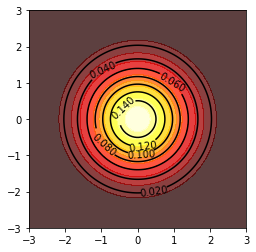

In [9]:
plt_multi_gauss(u, sigma)

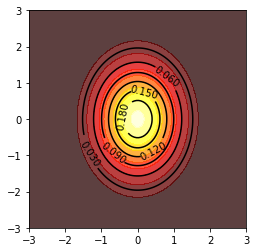

In [10]:
# 令特征1拥有较小的偏差，同时保持特征2的偏差
sigma = np.array([[0.6, 0], [0, 1]])
plt_multi_gauss(u, sigma)

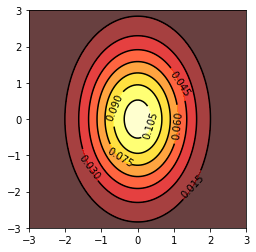

In [11]:
# 令特征2拥有较大的偏差，同时保持特征1的偏差
sigma = np.array([[1, 0], [0, 2]])
plt_multi_gauss(u, sigma)

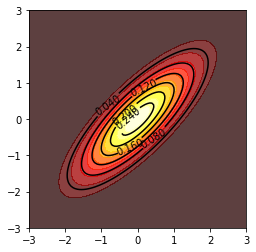

In [12]:
# 在不改变两个特征的原有偏差的基础上，增加两者之间的正相关性
sigma = np.array([[1, 0.8], [0.8, 1]])
plt_multi_gauss(u, sigma)

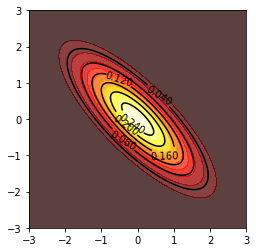

In [13]:
# 在不改变两个特征的原有偏差的基础上，增加两者之间的负相关性
sigma = np.array([[1, -0.8], [-0.8, 1]])
plt_multi_gauss(u, sigma)

# estimate multivariate Gaussian parameters $\mu$ and $\sigma^2$
> according to data, X1, and X2 is not independent

In [14]:
mu = X.mean(axis=0)
print(mu, '\n')

cov = np.cov(X.T)  # 协方差矩阵
print(cov)

[14.11222578 14.99771051] 

[[ 1.83862041 -0.22786456]
 [-0.22786456  1.71533273]]


$\Sigma = \frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu)(x^{(i)}-\mu)^T=\frac{1}{m}(X-\mu)^T(X-\mu)$

In [15]:
# example of creating 2d grid to calculate probability density
np.dstack(np.mgrid[0:3,0:3])

array([[[0, 0],
        [0, 1],
        [0, 2]],

       [[1, 0],
        [1, 1],
        [1, 2]],

       [[2, 0],
        [2, 1],
        [2, 2]]])

In [16]:
np.dstack?

Signature: np.dstack(tup)
Docstring:
Stack arrays in sequence depth wise (along third axis).

This is equivalent to concatenation along the third axis after 2-D arrays
of shape `(M,N)` have been reshaped to `(M,N,1)` and 1-D arrays of shape
`(N,)` have been reshaped to `(1,N,1)`. Rebuilds arrays divided by
`dsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of arrays
    The arrays must have the same shape along all but the third axis.
    1-D or 2-D arrays must have the same shape.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays, will be at least 3-D.

See Also
--------
concatenate : Join a sequence of arrays along an existing axis.
stack : Join a sequence of arrays alo

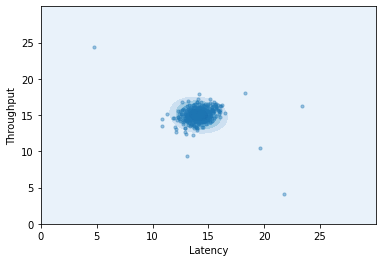

In [17]:
# create multi-var Gaussian model 多元高斯模型
multi_normal = stats.multivariate_normal(mu, cov)

# create a grid
x, y = np.mgrid[0:30:0.01, 0:30:0.01]
pos = np.dstack((x, y))

# x = np.linspace(-3, 3, 100)
# y = np.linspace(-3, 3, 100)
# xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots()

# plot probability density
ax.contourf(x, y, multi_normal.pdf(pos), cmap='Blues')

# plot original data points
sns.regplot('Latency', 'Throughput',
           data=pd.DataFrame(X, columns=['Latency', 'Throughput']), 
           fit_reg=False,
           ax=ax,
           scatter_kws={"s":10,
                        "alpha":0.4})
plt.show()

# select threshold $\epsilon$
1. use training set $X$ to model the multivariate Gaussian
2. use cross validation set $(Xval, yval)$ to find the best $\epsilon$ by finding the best `F-score`


![a](./F1-score.png)

In [18]:
def select_threshold(X, Xval, yval):
    """use CV data to find the best epsilon
    Returns:
        e: best epsilon with the highest f-score
        f-score: such best f-score
    """
    # create multivariate model using training data
    mu = X.mean(axis=0)
    cov = np.cov(X.T)
    multi_normal = stats.multivariate_normal(mu, cov)

    # this is key, use CV data for fine tuning hyper parameters
    pval = multi_normal.pdf(Xval)

    # set up epsilon candidates
    epsilon = np.linspace(np.min(pval), np.max(pval), num=10000)

    # calculate f-score
    fs = []
    for e in epsilon:
        y_pred = (pval <= e).astype('int')
        fs.append(f1_score(yval, y_pred))

    # find the best f-score
    argmax_fs = np.argmax(fs)

    return epsilon[argmax_fs], fs[argmax_fs]


In [19]:
from sklearn.metrics import f1_score, classification_report

In [20]:
e, fs = select_threshold(X, Xval, yval)
print('Best epsilon: {}\nBest F-score on validation data: {}'.format(e, fs))

Best epsilon: 2.707134692225132e-05
Best F-score on validation data: 0.888888888888889


# visualize prediction of `Xval` using learned $\epsilon$
1. use CV data to find the best $\epsilon$
2. use all data (training + validation) to create model
3. do the prediction on test data

In [21]:
def select_threshold(X, Xval, yval):
    """use CV data to find the best epsilon
    Returns:
        e: best epsilon with the highest f-score
        f-score: such best f-score
    """
    # create multivariate model using training data
    mu = X.mean(axis=0)
    cov = np.cov(X.T)
    multi_normal = stats.multivariate_normal(mu, cov)

    # this is key, use CV data for fine tuning hyper parameters
    pval = multi_normal.pdf(Xval)

    # set up epsilon candidates
    epsilon = np.linspace(np.min(pval), np.max(pval), num=10000)

    # calculate f-score
    fs = []
    for e in epsilon:
        y_pred = (pval <= e).astype('int')
        fs.append(f1_score(yval, y_pred))

    # find the best f-score
    argmax_fs = np.argmax(fs)

    return epsilon[argmax_fs], fs[argmax_fs]


def predict(X, Xval, e, Xtest, ytest):
    """with optimal epsilon, combine X, Xval and predict Xtest
    Returns:
        multi_normal: multivariate normal model
        y_pred: prediction of test data
    """
    Xdata = np.concatenate((X, Xval), axis=0)

    mu = Xdata.mean(axis=0)
    cov = np.cov(Xdata.T)
    multi_normal = stats.multivariate_normal(mu, cov)

    # calculate probability of test data
    pval = multi_normal.pdf(Xtest)
    y_pred = (pval <= e).astype('int')

    print(classification_report(ytest, y_pred))

    return multi_normal, y_pred


In [22]:
multi_normal, y_pred = predict(X, Xval, e, Xtest, ytest)

precision    recall  f1-score   support

           0       0.99      1.00      0.99       150
           1       1.00      0.50      0.67         4

    accuracy                           0.99       154
   macro avg       0.99      0.75      0.83       154
weighted avg       0.99      0.99      0.98       154



In [ ]:
# construct test DataFrame
data = pd.DataFrame(Xtest, columns=['Latency', 'Throughput'])
data['y_pred'] = y_pred

# create a grid for graphing
x, y = np.mgrid[0:30:0.01, 0:30:0.01]
pos = np.dstack((x, y))

fig, ax = plt.subplots()

# plot probability density
ax.contourf(x, y, multi_normal.pdf(pos), cmap='Blues')

# plot original Xval points
sns.regplot('Latency', 'Throughput',
            data=data,
            fit_reg=False,
            ax=ax,
            scatter_kws={"s":10,
                         "alpha":0.4})

# mark the predicted anamoly of CV data. We should have a test set for this...
anamoly_data = data[data['y_pred']==1]
ax.scatter(anamoly_data['Latency'], anamoly_data['Throughput'], marker='x', s=50)
plt.show()

# high dimension data

In [23]:
mat = sio.loadmat('./data/ex8data2.mat')

In [24]:
X = mat.get('X')
Xval, Xtest, yval, ytest = train_test_split(mat.get('Xval'),
                                            mat.get('yval').ravel(),
                                            test_size=0.5)

In [25]:
e, fs = select_threshold(X, Xval, yval)
print('Best epsilon: {}\nBest F-score on validation data: {}'.format(e, fs))

Best epsilon: 1.74667432759803e-19
Best F-score on validation data: 0.7272727272727273


In [26]:
multi_normal, y_pred = predict(X, Xval, e, Xtest, ytest)

precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.60      1.00      0.75         3

    accuracy                           0.96        50
   macro avg       0.80      0.98      0.86        50
weighted avg       0.98      0.96      0.96        50



In [27]:
print('find {} anamolies'.format(y_pred.sum()))

find 5 anamolies


The huge difference between my result, and the official `117` anamolies in the ex8 is due to:
1. my use of **multivariate Gaussian**
2. I split data very differently

In [28]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, centers=3, n_samples=500, random_state=42)

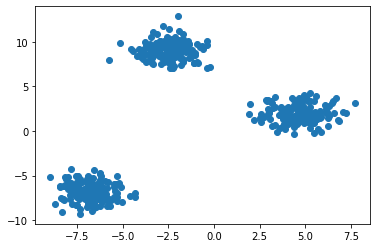

In [29]:
plt.scatter(X[:, 0], X[:, 1])

## 使用密度估计的异常检测

In [30]:
from sklearn.neighbors.kde import KernelDensity
np.set_printoptions(precision=4, threshold=16, suppress=True)


# 使用高斯核密度估计
kde = KernelDensity(kernel='gaussian')
kde.fit(X)

KernelDensity()

In [31]:
kde_X = kde.score_samples(X)
kde_X  # 对数似然, 越小样本越罕见

array([-4.0855, -5.3306, -4.9791, ..., -4.4575, -3.8469, -4.394 ])

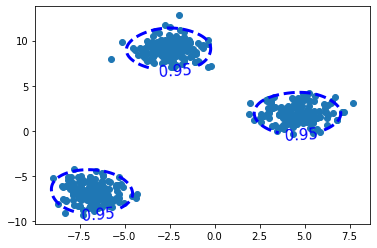

In [32]:
from scipy.stats.mstats import mquantiles
alpha_set = 0.95
tau_kde = mquantiles(kde_X, 1. - alpha_set)  # 0.05分位时的score值

n_samples, n_features = X.shape
X_range = np.zeros((n_features, 2))
X_range[:, 0] = np.min(X, axis=0) - 1.
X_range[:, 1] = np.max(X, axis=0) + 1.

h = 0.1  # step size of the mesh
x_min, x_max = X_range[0]
y_min, y_max = X_range[1]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]

Z_kde = kde.score_samples(grid)
Z_kde = Z_kde.reshape(xx.shape)

plt.figure()
c_0 = plt.contour(xx, yy, Z_kde, levels=tau_kde, colors='blue', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=15, fmt={tau_kde[0]: str(alpha_set)})
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 单类SVM
---
基于密度的估计的问题在于，当数据的维数增加时，它们往往变得低效。 这就是所谓的维度灾难，尤其会影响密度估算算法。 在这种情况下可以使用单类 SVM 算法。

In [33]:
from sklearn.svm import OneClassSVM

nu = 0.05  # 理论上说这应该是离群值的上限, 训练误差的上线
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)  # Unsupervised Outlier Detection.
ocsvm.fit(X)

OneClassSVM(gamma=0.05, nu=0.05)

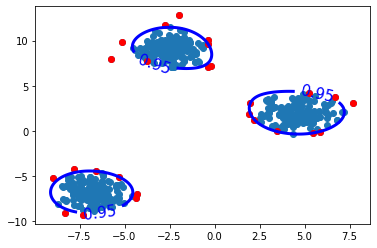

In [34]:
X_outliers = X[ocsvm.predict(X) == -1]

Z_ocsvm = ocsvm.decision_function(grid)
Z_ocsvm = Z_ocsvm.reshape(xx.shape)

plt.figure()
c_0 = plt.contour(xx, yy, Z_ocsvm, levels=[0], colors='blue', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=15, fmt={0: str(alpha_set)})
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red')
plt.show()

支持向量 - 离群点
---
所谓的单类 SVM 的支持向量形成离群点。

In [35]:
X_SV = X[ocsvm.support_]
n_SV = len(X_SV)
n_outliers = len(X_outliers)

print('{0:.2f} <= {1:.2f} <= {2:.2f}?'.format(1./n_samples*n_outliers, nu, 1./n_samples*n_SV))

0.05 <= 0.05 <= 0.06?


只有支持向量涉及单类 SVM 的决策函数。

- 绘制单类 SVM 决策函数的级别集，就像我们对真实密度所做的那样。
- 突出支持向量。

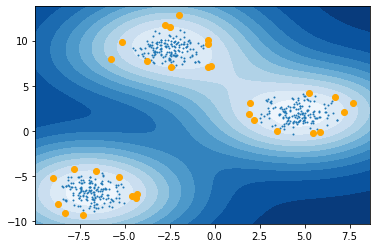

In [36]:
plt.figure()
plt.contourf(xx, yy, Z_ocsvm, 10, cmap=plt.cm.Blues_r)
plt.scatter(X[:, 0], X[:, 1], s=1.)
plt.scatter(X_SV[:, 0], X_SV[:, 1], color='orange')
plt.show()

## 隔离森林
---
隔离森林是一种基于树的异常检测算法。 该算法构建了许多随机树，其基本原理是，如果样本被隔离，在非常少量的随机分割之后，它应该单独存在于叶子中。 隔离森林根据样本最终所在的树的深度建立异常得分。

In [37]:
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest

digits = load_digits()

In [38]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [39]:
images = digits.images
labels = digits.target
images.shape  # 8*8图片

(1797, 8, 8)

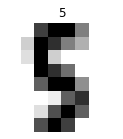

In [40]:
i = 102
plt.figure(figsize=(2, 2))
plt.title('{0}'.format(labels[i]))
plt.axis('off')
plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [41]:
# 将图片展开 
n_samples = len(images)
data = images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [42]:
X = data
y = labels
# 数字5
X_5 = X[y == 5]

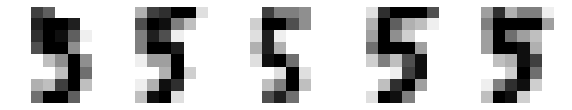

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, x in zip(axes, X_5[:5]):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')


In [44]:
# 使用IsolationForest来查找前 5% 最异常的图像。
iforest = IsolationForest(contamination=0.05, behaviour="new")
iforest.fit(X_5)

IsolationForest(behaviour='new', contamination=0.05)

(array([ 3.,  1.,  5.,  7., 11., 26., 36., 51., 36.,  6.]),
 array([-0.0652, -0.0448, -0.0244, -0.0041,  0.0163,  0.0367,  0.057 ,
         0.0774,  0.0977,  0.1181,  0.1385]),
 <a list of 10 Patch objects>)

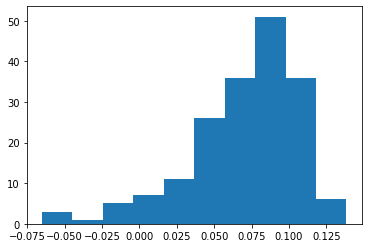

In [45]:
# 使用iforest.decision_function计算“异常”的级别。越低就越异常。
iforest_X = iforest.decision_function(X_5)  
plt.hist(iforest_X)

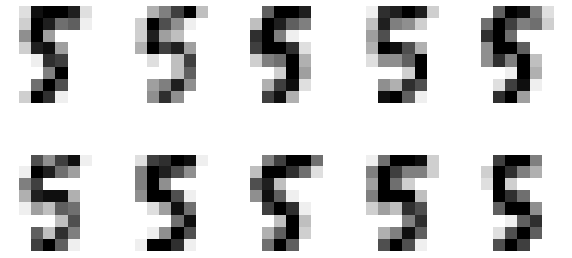

In [46]:
# 最正常的10个值
X_strong_inliers = X_5[np.argsort(iforest_X)[-10:]]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_strong_inliers[i].reshape((8, 8)),
               cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')

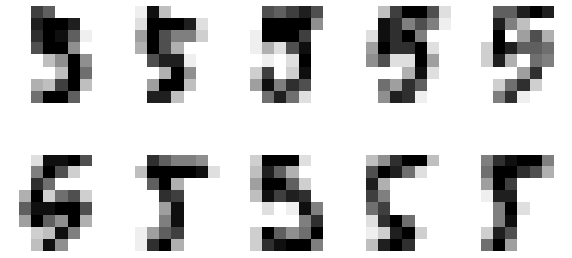

In [47]:
# 最异常的值
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

X_outliers = X_5[iforest.predict(X_5) == -1]

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_outliers[i].reshape((8, 8)),
               cmap=plt.cm.gray_r, interpolation='nearest')
    ax.axis('off')